In [1]:
import pandas as pd
import numpy as np
import json
import peakutils
import matplotlib.pyplot as plt

In [2]:
def load_json(file):
    '''
    Loads txt file and returns json dict
    '''
    data = {}
    with open(file, encoding='utf-8') as f:
        for line in f:
            d = str(line).replace("'", '"')
            data = json.loads(d)
    
    return data

In [87]:
def get_sequence(data_list, sensor):
    '''
    Return list of sensor data from data_list
    '''
    l = []       
    for i in range(len(data)):
        lst = []
        for j in range(len(data[i]['seq'])):            
            lst.append(data[i]['seq'][j]['data'][sensor])
        l.append(lst)
        
    return l

In [92]:
def get_mean_sd_peaks(seq_data):
    '''
    Calculates the mean, sd, and number of peaks for each sequence of data for each sensor
    '''
    means = []
    stds = []
    peaks = []
    for lst in seq_data:
        means.append(np.mean(lst))
        stds.append(np.std(lst))
        peaks.append(len(peakutils.indexes(lst, thres=0.02/max(lst), min_dist=0.1)))
    
    return means, stds, peaks

In [95]:
means, stds, peaks = get_mean_sd_peaks(x_accl)

In [142]:
def process_sequence(file):
    '''
    Loads data and creates dictionary of calculations from accelerometer data
    '''
    data = load_json(file)
    
    # obtain actitivy from trace
    activity = data[0]['type']
    
    # obtain accelerometer data from each axis
    x_accl = get_sequence(data, 'xAccl')
    y_accl = get_sequence(data, 'yAccl')
    z_accl = get_sequence(data, 'zAccl')
    
    # obtain gyroscope data from each axis
    x_gyro = get_sequence(data, 'xGyro')
    y_gyro = get_sequence(data, 'yGyro')
    z_gyro = get_sequence(data, 'zGyro')

    # obtain mag sensor data from each axis
    x_mag = get_sequence(data, 'xMag')
    y_mag = get_sequence(data, 'yMag')
    z_mag = get_sequence(data, 'zMag')
        
    # calculate means, sd, num peaks for data sequence
    x_accl_mean, x_accl_sd, x_accl_peaks = get_mean_sd_peaks(x_accl)
    y_accl_mean, y_accl_sd, y_accl_peaks = get_mean_sd_peaks(y_accl)
    z_accl_mean, z_accl_sd, z_accl_peaks = get_mean_sd_peaks(z_accl)
    
    x_gyro_mean, x_gyro_sd, x_gyro_peaks = get_mean_sd_peaks(x_gyro)
    y_gyro_mean, y_gyro_sd, y_gyro_peaks = get_mean_sd_peaks(y_gyro)
    z_gyro_mean, z_gyro_sd, z_gyro_peaks = get_mean_sd_peaks(z_gyro)
    
    x_mag_mean, x_mag_sd, x_mag_peaks = get_mean_sd_peaks(x_mag)
    y_mag_mean, y_mag_sd, y_mag_peaks = get_mean_sd_peaks(y_mag)
    z_mag_mean, z_mag_sd, z_mag_peaks = get_mean_sd_peaks(z_mag)     
    
#         clean_data['activity'].append(activity),
#                       'x_accl_mean': x_accl_mean[i], 'x_accl_sd': x_accl_sd[i], 'x_accl_peaks': x_accl_peaks[i],
#                       'y_accl_mean': y_accl_mean[i], 'y_accl_sd': y_accl_sd[i], 'y_accl_peaks': y_accl_peaks[i],
#                       'z_accl_mean': z_accl_mean[i], 'z_accl_sd': z_accl_sd[i], 'z_accl_peaks': z_accl_peaks[i],
#                       'x_gyro_mean': x_gyro_mean[i], 'x_gyro_sd': x_gyro_sd[i], 'x_gyro_peaks': x_gyro_peaks[i],
#                       'y_gyro_mean': y_gyro_mean[i], 'y_gyro_sd': y_gyro_sd[i], 'y_gyro_peaks': y_gyro_peaks[i],
#                       'z_gyro_mean': z_gyro_mean[i], 'z_gyro_sd': z_gyro_sd[i], 'z_gyro_peaks': z_gyro_peaks[i], 
#                       'x_mag_mean': x_mag_mean[i], 'x_mag_sd': x_mag_sd[i], 'x_mag_peaks': x_mag_peaks[i], 
#                       'y_mag_mean': y_mag_mean[i], 'y_mag_sd': y_mag_sd[i], 'y_mag_peaks': y_mag_peaks[i],
#                       'z_mag_mean': z_mag_mean[i], 'z_mag_sd': z_mag_sd[i], 'z_mag_peaks': z_mag_peaks[i]}
    
    cols = ['x_accl_mean', 'x_accl_sd', 'x_accl_peaks',
            'y_accl_mean', 'y_accl_sd', 'y_accl_peaks',
            'z_accl_mean', 'z_accl_sd', 'z_accl_peaks',
            'x_gyro_mean', 'x_gyro_sd', 'x_gyro_peaks',
            'y_gyro_mean', 'y_gyro_sd', 'y_gyro_peaks',
            'z_gyro_mean', 'z_gyro_sd', 'z_gyro_peaks', 
            'x_mag_mean', 'x_mag_sd', 'x_mag_peaks', 
            'y_mag_mean', 'y_mag_sd', 'y_mag_peaks',
            'z_mag_mean', 'z_mag_sd', 'z_mag_peaks']
    data_list = [x_accl_mean, x_accl_sd, x_accl_peaks,
                y_accl_mean, y_accl_sd, y_accl_peaks,
                z_accl_mean, z_accl_sd, z_accl_peaks,
                x_gyro_mean, x_gyro_sd, x_gyro_peaks,
                y_gyro_mean, y_gyro_sd, y_gyro_peaks,
                z_gyro_mean, z_gyro_sd, z_gyro_peaks, 
                x_mag_mean, x_mag_sd, x_mag_peaks, 
                y_mag_mean, y_mag_sd, y_mag_peaks,
                z_mag_mean, z_mag_sd, z_mag_peaks] 
    
    df = pd.DataFrame(columns=('activity', 'x_accl_mean', 'x_accl_sd', 'x_accl_peaks',
            'y_accl_mean', 'y_accl_sd', 'y_accl_peaks',
            'z_accl_mean', 'z_accl_sd', 'z_accl_peaks',
            'x_gyro_mean', 'x_gyro_sd', 'x_gyro_peaks',
            'y_gyro_mean', 'y_gyro_sd', 'y_gyro_peaks',
            'z_gyro_mean', 'z_gyro_sd', 'z_gyro_peaks', 
            'x_mag_mean', 'x_mag_sd', 'x_mag_peaks', 
            'y_mag_mean', 'y_mag_sd', 'y_mag_peaks',
            'z_mag_mean', 'z_mag_sd', 'z_mag_peaks'))
    
    # store processed data in dictionary
    df_rows = []
    for i in range(len(data_list)):
        l = []
        for j in range(len(data_list[i])):
            print(data_list[i][j])
            l.append(data_list[i][j])
        df_rows.append(l)
    
    return x_accl_mean
    df = pd.DataFrame(clean_data, index=[0])
    return df

In [143]:
df = process_sequence('class-data/driving.txt')

-52.7527472527
-50.6457326892
-80.7177046505
-81.6649595687
-50.2204336399
-50.4906649198
-47.6040140172
-54.3626198083
-51.88091354
-51.6648022373
-77.8790584416
-76.3926848875
-78.3532763533
-178.523534269
-175.187957689
-83.6231766613
-84.3852988691
-175.828914664
-176.306683067
-174.277868186
-179.399006623
-152.463356974
-169.75465587
83.2777912437
92.0149996628
45.6672972002
47.3224317396
88.3364564034
88.0593533722
111.691159868
107.143932077
84.0654100053
93.5549724397
54.8222406323
50.917282657
49.945731054
107.986886683
119.815839097
69.1654452349
75.5442140832
106.865102349
90.4727291485
110.59353742
117.134286011
108.599935805
99.1207935253
491
495
1039
1023
866
882
819
320
667
682
679
680
682
311
327
338
339
662
661
689
672
331
336
1.60769230769
8.81535158347
13.7677454447
12.4318059299
14.7135348226
11.0943334425
7.77413188914
-13.0511182109
-24.2520391517
10.7167399121
17.1866883117
15.7254823151
18.1334961335
-6.382328654
14.3946297803
-3.70502431118
8.79240710824
37.05

In [144]:
df

[-52.752747252747255,
 -50.645732689210952,
 -80.717704650530322,
 -81.664959568733153,
 -50.220433639947437,
 -50.490664919751062,
 -47.604014017202928,
 -54.362619808306711,
 -51.880913539967374,
 -51.664802237315222,
 -77.879058441558442,
 -76.392684887459808,
 -78.353276353276357,
 -178.52353426919902,
 -175.18795768917821,
 -83.623176661264182,
 -84.385298869143782,
 -175.82891466445733,
 -176.30668306683066,
 -174.27786818551667,
 -179.39900662251657,
 -152.46335697399527,
 -169.75465587044533]

In [102]:
def plot_traces(plots, activity):
    x,y,z = plots
    plt.figure(figsize=(15,5))
    plt.plot(x, label='x')
    plt.plot(y, label='y')
    plt.plot(z, label='z')
    plt.legend()
    plt.title(activity)
    plt.savefig(activity + '.png')
    plt.show()

In [20]:
master = []

for i in ['driving','standing','walking','jumping']:
#     for j in ['0','1']:
#         dataset = i + j
        plots, df = process_sequence('class-data/' + i + '.txt')
        # plot_traces(plots, dataset)
        master += [df]

master = pd.concat(master)
master['activity_factor'] = pd.factorize(master['activity'])[0]
master

TypeError: list indices must be integers or slices, not dict

In [6]:
train = master # .iloc[::2, :]
test = master.iloc[1::2, :]

In [7]:
y_train = train['activity_factor']
x_train = train.drop(['activity_factor', 'activity'], axis=1)

In [8]:
y_test = test['activity_factor']
x_test = test.drop(['activity_factor', 'activity'], axis=1)

In [15]:
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.learning_curve import validation_curve
import seaborn as sns

In [10]:
C_params = np.logspace(-6, 3, 10)
svc_2 = LinearSVC(random_state = 12)

train_scores, test_scores = validation_curve(
    svc_2, x_train.values, y_train.values.flatten(),
    param_name="C", param_range=C_params,
    cv=2, scoring="accuracy", n_jobs=-1)

In [11]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

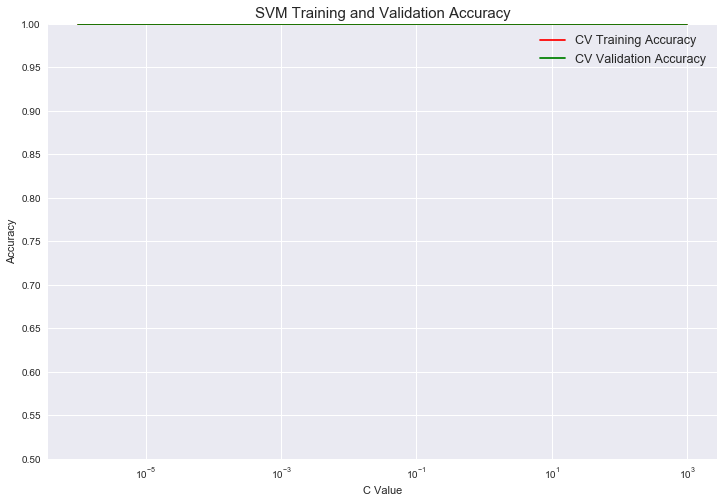

In [12]:
y_min = 0.5
y_max = 1.0

f = plt.figure(figsize = (12, 8))
ax = plt.axes()
sns.set(font_scale = 1.25)
sns.set_style("darkgrid")
plt.title("SVM Training and Validation Accuracy")
plt.xlabel("C Value")
plt.ylabel("Accuracy")
plt.ylim(y_min, y_max)
plt.yticks(np.arange(y_min, y_max + .01, .05))
plt.semilogx(C_params, train_scores_mean, label="CV Training Accuracy", color="red")
plt.fill_between(C_params, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="red")
plt.semilogx(C_params, test_scores_mean, label="CV Validation Accuracy",
             color="green")
plt.fill_between(C_params, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="green")
plt.legend(loc="best")
plt.show()

In [13]:
from sklearn.svm import SVC

Cs = np.logspace(-6, 3, 10)
parameters = [{'kernel': ['rbf'], 'C': Cs},
              {'kernel': ['linear'], 'C': Cs}]

svc = SVC(random_state = 12)

clf = GridSearchCV(estimator = svc, param_grid = parameters, cv = 2, n_jobs = -1)
clf.fit(x_train.values, y_train.values)

GridSearchCV(cv=2, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}, {'kernel': ['linear'], 'C': array([  1.00000e-06,   1.00000e-05,   1.00000e-04,   1.00000e-03,
         1.00000e-02,   1.00000e-01,   1.00000e+00,   1.00000e+01,
         1.00000e+02,   1.00000e+03])}],
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [14]:
print(clf.best_estimator_)
print(clf.best_params_)
print(clf.best_score_)

SVC(C=9.9999999999999995e-07, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=12, shrinking=True,
  tol=0.001, verbose=False)
{'kernel': 'linear', 'C': 9.9999999999999995e-07}
1.0
